In [1]:
%tensorflow_version 2.x

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)


2.4.1
2.4.0


In [3]:
mnist = tf.keras.datasets.mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
x_train.shape, y_train.shape


((60000, 28, 28), (60000,))

In [11]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

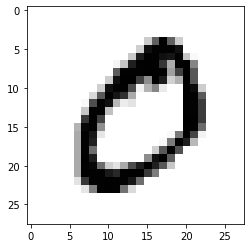

In [13]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [15]:
print(y_train[1])

0


In [16]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7658 - accuracy: 0.7905
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3468 - accuracy: 0.9009
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3311 - accuracy: 0.9058
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3177 - accuracy: 0.9099
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3067 - accuracy: 0.9123


In [19]:
predictions = model.predict(x_test)

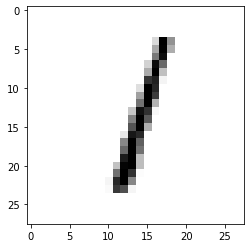

In [29]:
plt.imshow(x_test[2], cmap=plt.cm.binary)
plt.show()

In [26]:
print (predictions[2])

[2.0065290e-06 9.7784746e-01 8.7117311e-03 2.9390026e-03 2.5690347e-04
 1.1318062e-03 2.1852106e-03 1.0743558e-03 5.4207947e-03 4.3077386e-04]


In [27]:
import numpy as np
print(np.argmax(predictions[2]))

1


In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 967us/step - loss: 0.2700 - accuracy: 0.9255


[0.26995161175727844, 0.9254999756813049]